**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment08 - Binary Classifier(Zero Classifier)***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment08)

# Setting Up

We should get ready to read mnist files. 

**Careful! It's really huge!** You should have enough free memory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Functions

Theres some funtions implemented below.

We should normalize the input data to get rid of bias.

We are implementing binary classifier, so if label is 0, it is the answer. Otherwise, it isn't.

In [2]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# return 1 only if the value is what we are looking for. Otherwise -1.
#
def bi_partitioning(M,val):
    length = len(M)
    res = np.zeros((length))
    for i in range(length):
        if(M[i] == val):
            res[i] = 1
        else:
            res[i] = -1
    return res

#
# sign funtion
#
def sign(x):
    if(x>=0):
        return 1
    else:
        return -1
    

# Vectorize the Input Data

We should get first element of MNIST data to get label.

The real image data starts from second element.

In [3]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)
list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# To make it Linearly Indepent

We should erase **zero column** from the input data. This makes Matrix A as **dependent**, which makes impossible to get **pseudo inverse**.

This means that in theta, the **ith value** is **0**. 

$$\theta = [\theta_{1} \theta_{2} \cdots \theta_{784}]$$

$$\theta_{i} = 0$$

In [4]:
index = np.where(~list_image_train.any(axis=1))[0]
A = list_image_train[~np.all(list_image_train == 0, axis=1)]
A = np.matrix(np.transpose(A))
B = np.matrix(np.transpose(bi_partitioning(list_label_train,0)))   # (60000, 1)

# Pseudo Inverse and Model Parameter

We get temporary theta by pseudo inverse. This is not real theta since we erased zero column.

Function ```reshape``` make (1,784) to (28, 28).

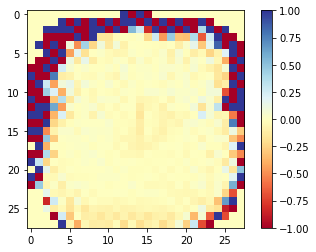

In [5]:
temp_theta = (A.T * A).I*A.T*B.T
theta = np.zeros((size_col*size_row))
count = 0
for i in range(size_col*size_row):
    if i not in index:
        theta[i]=temp_theta[count]
        count+=1

plt.imshow(theta.reshape((size_row, size_col)), cmap='RdYlBu')
plt.clim(-1,1)
plt.colorbar()
plt.show()

# Evaluation Value Table

To show as table form, I imported ```pandas```. This module make it easy to plot dataframe.

```B_hat``` means the **answer(y)**, while ```theta.dot(list_image_test[:,i])``` means the **y_hat**.

In [7]:
import pandas as pd
from pandas import Series, DataFrame

table = np.zeros((2,2))
B_hat = bi_partitioning(list_label_test,0)
im_avg = np.zeros((size_row*size_col,4))

for i in range(num_test):
    if sign(theta.dot(list_image_test[:,i])) == 1:
        if(B_hat[i] == 1):
            # True Positive
            table[0][0] += 1
            im_avg[:,0] += list_image_test[:,i]
        else:
            # False Positive
            table[1][0] += 1
            im_avg[:,1] += list_image_test[:,i]
    else:
        if(B_hat[i] == 1):
            # False Negative
            table[0][1] += 1
            im_avg[:,3] += list_image_test[:,i]
        else:
            # True Negative
            table[1][1] += 1
            im_avg[:,2] += list_image_test[:,i]
im_avg[:,0] /= table[0][0]
im_avg[:,1] /= table[1][0]
im_avg[:,2] /= table[1][1]
im_avg[:,3] /= table[0][1]

            
# make result as dataframe        
data = {
    'y_hat = +1' : [table[0][0],table[1][0],sum(table[:,0])],
    'y_hat = -1' : [table[0][1],table[1][1],sum(table[:,1])],
    'Total' : [sum(table[0]),sum(table[1]), sum(sum(table))] 
}
frame = DataFrame(data,columns = ['y_hat = +1','y_hat = -1','Total'], index = ['y = +1','y = -1','All'])
display(frame)

print("error rate : " + str((table[0][1]+table[1][0])/num_test*100) + "%")
print("recall rate : " + str(table[0][0]/sum(table[0])*100) + "%")
print("false alarm rate : " + str(table[1][0]/sum(table[1])*100) + "%")

,y_hat = +1,y_hat = -1,Total
y = +1,896.0,84.0,980.0
y = -1,204.0,8816.0,9020.0
All,1100.0,8900.0,10000.0


error rate : 2.88%
recall rate : 91.42857142857143%
false alarm rate : 2.261640798226164%


# Average Image of Each Table Value

While classifing data, I also calculated average image of each TP,FP, TN, and FN.

Average image of each one is plotted.

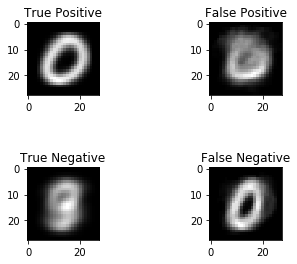

In [8]:
p1 = plt.subplot(2,2,1)
p1.imshow(im_avg[:,0].reshape((size_row, size_col)),cmap='gray')
p1.set_title("True Positive")
p2 = plt.subplot(2,2,2)
p2.imshow(im_avg[:,1].reshape((size_row, size_col)),cmap='gray')
p2.set_title("False Positive")
p3 = plt.subplot(2,2,3)
p3.imshow(im_avg[:,2].reshape((size_row, size_col)),cmap='gray')
p3.set_title("True Negative")
p4 = plt.subplot(2,2,4)
p4.imshow(im_avg[:,3].reshape((size_row, size_col)),cmap='gray')
p4.set_title("False Negative")
plt.subplots_adjust(hspace=1)